In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Total correct 56.40% of the time


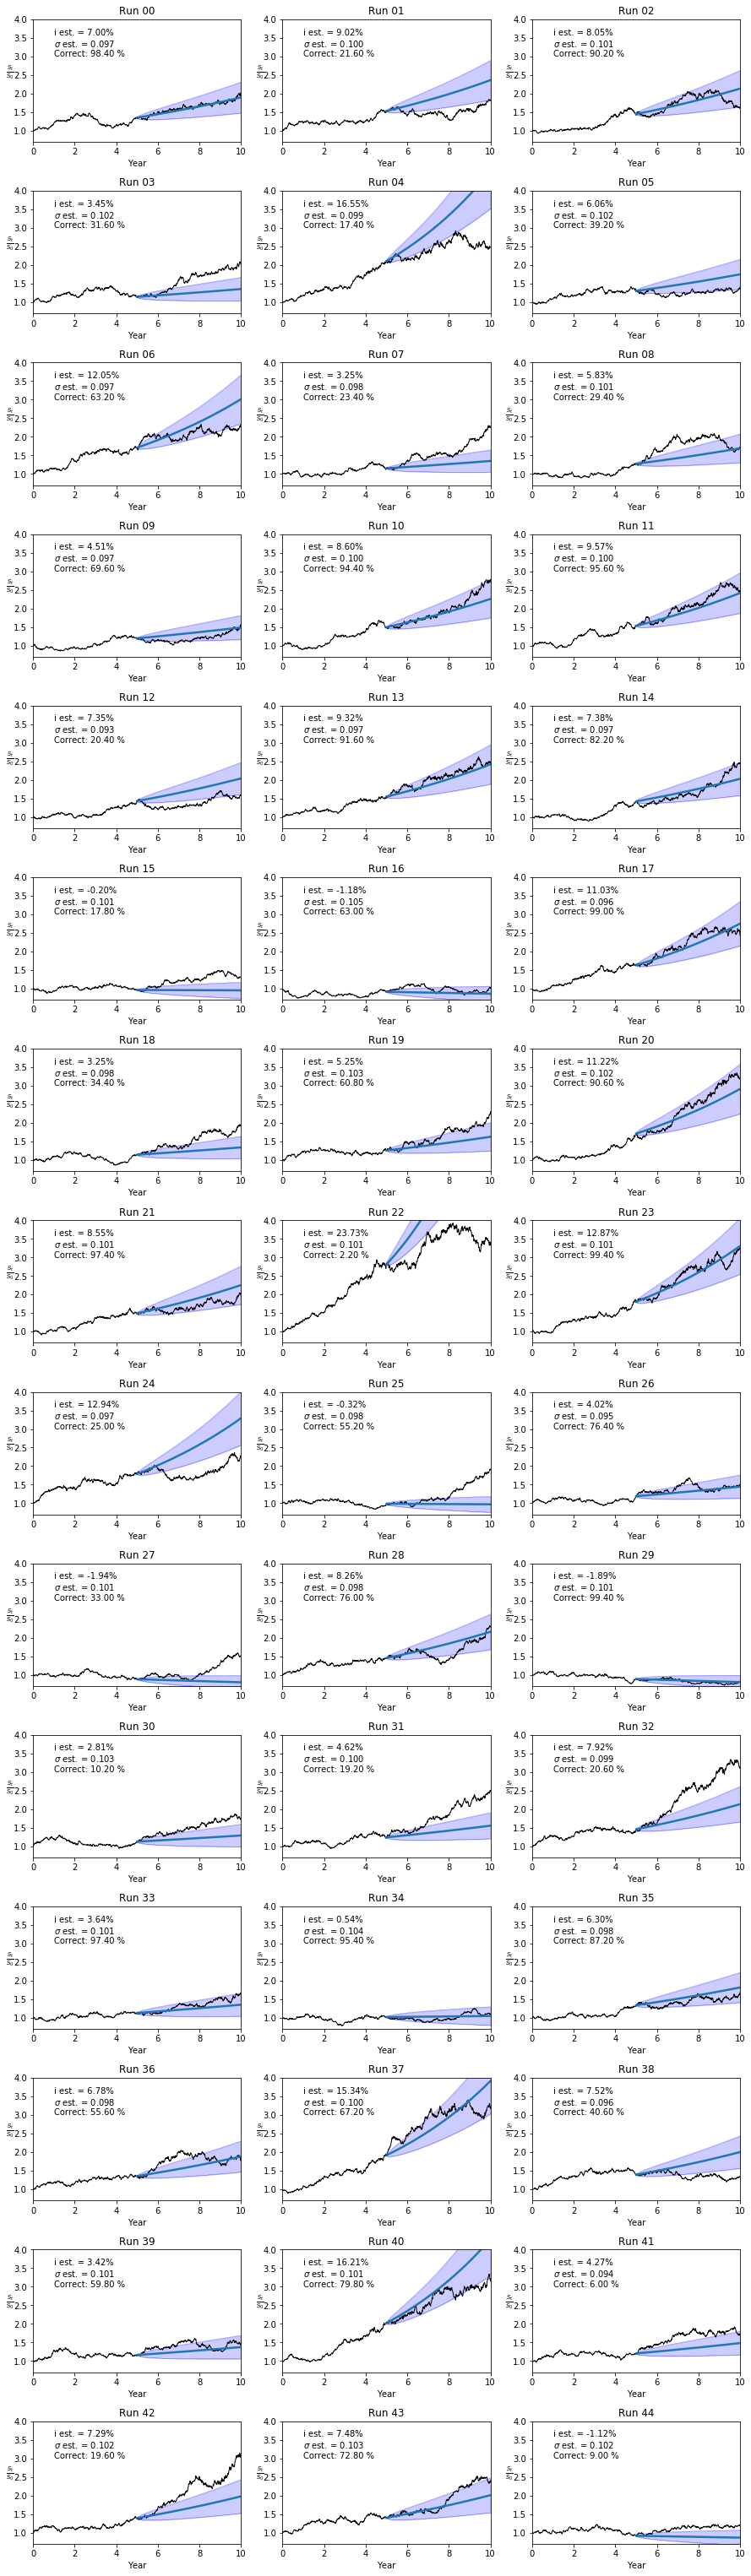

In [79]:
# Paraameters obtained from literature
eps = 0.01
i = 0.06
delta = np.log(1+i)

#Timeframe and number of interations
n = 1000
time = 10.

index = 0

fig, axs = plt.subplots(15, 3, figsize=(15,55 ), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)

axs = axs.ravel()

track_record = np.zeros(45)

for k in range(45):
    x = np.linspace(0,time,n)
    noise = np.cumsum(np.random.normal(0,1,n))
    y = np.exp((delta-0.5*eps**2)*x + eps*noise)

    y_train = y[:int(n/2)]
    
    #Estimate parameters

    sigma_sqred = np.var(y_train)

    x_k = int(n/2)*[0]


    for j in range(1,int(n/2)):
        x_k[j] = np.log(y_train[j]/y_train[j-1])


    mu = np.mean(x_k)
    nu_sqred = np.var(x_k)    
    
    del_t = time/n

    sigma_sqred = nu_sqred/del_t
    r1 = mu/del_t + 0.5*sigma_sqred

    i2 = np.exp(r1) - 1
    x_half = x[:int(n/2)] + time/2
    
    future_stock = y[int(n/2)]*np.exp(r1* x[:int(n/2)])
    future_upper = y[int(n/2)]*np.exp(r1*x[:int(n/2)])*(1 + np.sqrt( np.exp(sigma_sqred*(x[:int(n/2)])) -1 ))
    future_lower = y[int(n/2)]*np.exp(r1*x[:int(n/2)])*(1 - np.sqrt( np.exp(sigma_sqred*x[:int(n/2)]) -1 ))
    
    #Count percentage true value falls in cone of uncertainty
    counter = 0.
    for i in range (int(n/2)):
        if future_lower[i] < y[int(n/2) + i] < future_upper[i]:
            counter +=1
            
    correct_pred = counter/int(n/2)
    track_record[k] =correct_pred
    
    axs[index].plot(x, y, color = 'k', linewidth = '1')
    axs[index].plot(x_half, future_stock, linewidth = '2.5')
    axs[index].plot(x_half, future_upper, color ='blue', linewidth = '0.2' )
    axs[index].plot(x_half, future_lower, color = 'blue', linewidth = '0.2' )
    axs[index].fill_between(x_half , future_lower, future_upper, color='blue', alpha='0.2' )

    
    axs[index].set_ylim(0.7,4)
    axs[index].set_xlim(0,time)
    axs[index].set_xlabel('Year')
    axs[index].set_ylabel(r'$\frac{S_t}{S_0}$', rotation = 0)
    axs[index].set_title('Run {:02.0f}'.format(index))
    axs[index].text(1,3, 
                    'i est. = {0:04.2f}%\n$\sigma$ est. = {1:04.3f} \nCorrect: {2:04.2f} %'.format(100*i2, np.sqrt(sigma_sqred), 100*correct_pred))

    
    index += 1

print('Total correct {:04.2f}% of the time'.format(100*np.mean(track_record)) )
plt.savefig('SP500 Geometric Brownian model 10 years.png', dpi=300)

Total correct 67.26% of the time


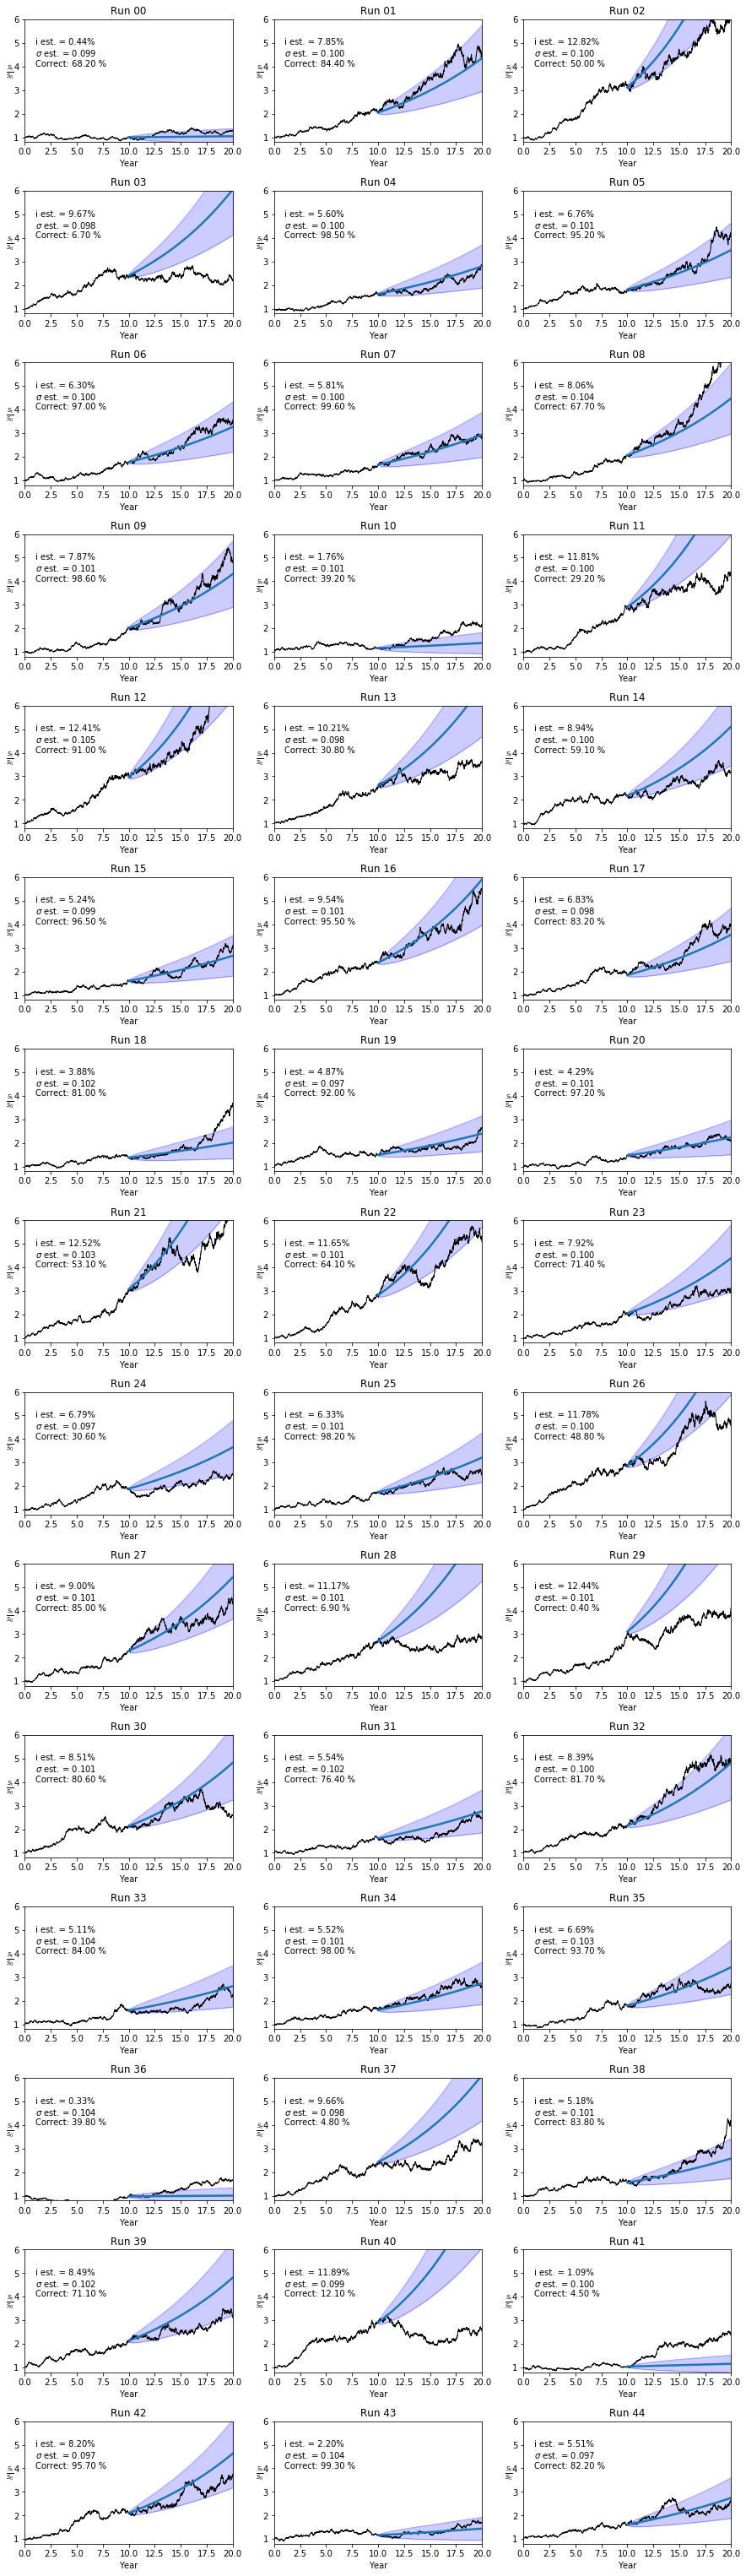

In [80]:
#Basically same as above, but over 20 year period
# Paraameters obtained from literature
eps = 0.01
i = 0.06
delta = np.log(1+i)

#Timeframe and number of interations
n = 2000
time = 20.


# Try experiment 45 times
index = 0

fig, axs = plt.subplots(15, 3, figsize=(15,55 ), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)

axs = axs.ravel()

track_record = np.zeros(45)

for k in range(45):
    x = np.linspace(0,time,n)
    noise = np.cumsum(np.random.normal(0,1,n))
    y = np.exp((delta-0.5*eps**2)*x + eps*noise)

    y_train = y[:int(n/2)]


    #Estimate parameters
    sigma_sqred = np.var(y_train)
    x_k = int(n/2)*[0]

    for j in range(1,int(n/2)):
        x_k[j] = np.log(y_train[j]/y_train[j-1])

    mu = np.mean(x_k)
    nu_sqred = np.var(x_k)    
    
    del_t = time/n

    sigma_sqred = nu_sqred/del_t
    r1 = mu/del_t + 0.5*sigma_sqred

    i2 = np.exp(r1) - 1
    x_half = x[:int(n/2)] + time/2
    
    
    # Guess future based on expection value and standard deviation
    future_stock = y[int(n/2)]*np.exp(r1* x[:int(n/2)])
    future_upper = y[int(n/2)]*np.exp(r1*x[:int(n/2)])*(1 + np.sqrt( np.exp(sigma_sqred*(x[:int(n/2)])) -1 ))
    future_lower = y[int(n/2)]*np.exp(r1*x[:int(n/2)])*(1 - np.sqrt( np.exp(sigma_sqred*x[:int(n/2)]) -1 ))
    
    #Count percentage true value falls in cone of uncertainty
    counter = 0.
    for i in range (int(n/2)):
        if future_lower[i] < y[int(n/2) + i] < future_upper[i]:
            counter +=1
            
    correct_pred = counter/int(n/2)
    track_record[k] =correct_pred
    
    
    #Plot
    axs[index].plot(x, y, color = 'k', linewidth = '1')
    axs[index].plot(x_half, future_stock, linewidth = '2.5')
    axs[index].plot(x_half, future_upper, color ='blue', linewidth = '0.2' )
    axs[index].plot(x_half, future_lower, color = 'blue', linewidth = '0.2' )
    axs[index].fill_between(x_half , future_lower, future_upper, color='blue', alpha='0.2' )

    
    axs[index].set_ylim(0.8,6)
    axs[index].set_xlim(0,time)
    axs[index].set_xlabel('Year')
    axs[index].set_ylabel(r'$\frac{S_t}{S_0}$', rotation = 0)
    axs[index].set_title('Run {:02.0f}'.format(index))
    axs[index].text(1,4, 
                    'i est. = {0:04.2f}%\n$\sigma$ est. = {1:04.3f} \nCorrect: {2:04.2f} %'.format(100*i2, np.sqrt(sigma_sqred), 100*correct_pred))

    
    index += 1

print('Total correct {:04.2f}% of the time'.format(100*np.mean(track_record)) )
plt.savefig('SP500 Geometric Brownian model 20 years.png', dpi=300)